In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw8.ipynb")

# Homework 8: Nearest Neighbors Regression 🏘

Name: Sarah Wilkinson

Student ID: 486676

Collaborators: Vinya Reddy


## Instructions

In this homework, we will be exploring a more realistic application of similarity-based leanring. It might be helpful to review **Lab 8: Similarity-based Prediction with k-NN** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have all of the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Feel free to add as many cells as you need to** — just make sure you don't change what we gave you. 
* **Does it spark joy?** Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it. Remember that part of data science is the effective presentation of results.

## 1. Using `sklearn` for $k$-Nearest Neighbors

In Lab 8, we got familiar with $k$-nearest neighbors ($k$-NN) by implementing the algorithm. If you are still not comfortable with how the algorithm works, then we suggest that you review your work from the lab. In this home work, we will proceed under the assumption that you are familiar with $k$-NN.

In this section, we will explore how to use the [$k$-NN _regression_ model supplied by `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor). You can find the [$k$-NN _classification_ model here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

### Loading and Preparing the Data

We'll need to start by getting some data — what is data science without data? For this assignment, we will be revisiting another old friend: the Boston Housing dataset.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X_all, y = boston.data, boston.target

While we're here, let's review what this dataset is about.

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<!-- BEGIN QUESTION -->

### Problem 1.1

**Write-up!** How many examples are in the dataset? How many features does it have? What are the features? What is the target variable that we would like to estimate/predict? What kind of machine learning problem is this?

There are 506 examples or data points in the data. This dataset has 14 features. These features include per capita crime rate by town, proportion of residential land zoned for lots over 25,000 sq.ft, proportion of non-retail business acres per town
, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), nitric oxides concentration (parts per 10 million), average number of rooms per dwelling
, proportion of owner-occupied units built prior to 1940, weighted distances to five Boston employment centres, index of accessibility to radial highways, full-value property-tax rate per $10,000, pupil-teacher ratio by town, 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, % lower status of the population, Median value of owner-occupied homes in $1000's. The target variable is Median value of owner-occupied homes in $1000's.


<!-- END QUESTION -->

Based on our discussions in `Lab4` and `hw4`, we will include all data points and all features but _1000(Bk - 0.63)^2_ where _Bk_ is the proportion of blacks by town encoded as `'B'`. 

In [4]:
# remove 'B' feature
features_to_use = boston.feature_names!='B'
X = X_all[:, features_to_use]

### Scaling Data

In the lab, we also looked at data scaling and transformations. Here we'll demonstrate how to use `sklearn` to help us with this.

**Approach 1:** 

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# new train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

# compute the mean and standard deviation on a training set 
scaler = preprocessing.StandardScaler().fit(X_train)

# apply the transforamtion to both the trainnig and the test set
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

**Approach 2:** 
An alternative and much quicker way of scaling the the data is the following.

In [6]:
X_scaled = preprocessing.scale(X)

<!-- BEGIN QUESTION -->

### Problem 1.2

**Write-up** What types of scaling does `StandardScaler()` and `scale` perform? Which of the two procedures is a more appropriate preprocessing step for supervised machine learning and _why_? 
> **Hint:** Use the [`?` operator](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html#accessing-help) to get more information about the two scaling methods. 

StandardScaler() removes the mean and scales the data to unit variance. Scale centers the data to the mean and component wise scales to unit variance. Unit variance means that the standard deviation of a sample as well as the variance will tend towards 1 as the sample size tends towards infinity. This is helpful because it means that our data will be within a similar range, which is necessary for models that use a distance measure to measure similarity, like the KNN model, to prevent one feature from overshadowing the others. We would want to use StandardScaler() for supervised machine learning because it allows us to apply the same transformation to another set, which we would need to do for the testing set in order to get valid output that we can use to evaluate the model.

<!-- END QUESTION -->

### Looking Into the Model

Now that we have some data to play with, let's try building a $k$-NN regression model. The model provided by `sklearn` shares a similar interface with the other models that we have looked at previously (especially $k$-means).

In [7]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

### Problem 1.3

Use the [`?` operator](https://ipython.readthedocs.io/en/stable/interactive/python-ipython-diff.html#accessing-help) provided by IPython to explore `model` and it's interface.

**Do this!** In the cell below, complete the following:
1. create and fit a new `KNeighborsRegressor` model with 5 neighbors.
2. make some predictions using the model on your testing data.
3. evaluate the performance of the model by computing $R^2$ and storing it in `r_squared`.

In [8]:
import numpy as np

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r_squared = model.score(X_test, y_test)

r_squared


0.7051364300656733

In [9]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Problem 1.4

**Write-up!** What was the $R^2$ value for your k-NN model using five neighbors? What does $R^2$ tell you about a model? What does this particular score tell you about your k-NN model?

**SOLUTION:**
The R^2 value for my k-NN model using five neighbors was 0.7051364300656733. R^2 is used to tell how much of the variation in the dependent variable can be explained by the independent variable(s). This means that about 70% of the observed variation in this model can be explained by the model's inputs.

<!-- END QUESTION -->

With that, let's move on to some more interesting things.

## 2. Choosing $k$ with Cross Validation

In order to test whether the `k-NN` algorithm (or any other machine learning algorithm) performs how we want it to and accurately makes predictions, we must compare the known label of all datapoints to the predicted label of those same datapoints. So far we have seen this in the forms of model evaluation and validation in model selection. 

In model evaluation we partitioned our original dataset into two parts: a training set and a testing set. As we have seen earlier in the course, the testing set is a smaller percentage of the total dataset than the training set.

Later on, in model selection, we explored why it was important to have yet another set of data partitioned out for usage as a validation set, which we could use to experiment with a model's hyperparameters (value that is used to control the learning process). The validation set allowed us to "evaluate" our model's performance with various settings of its parameters while maintaining a completely untouched dataset for out final evaluation.

We can extend this idea once again to improve our estimates of model performance using **cross validation**.

> **CAUTION:** It is a total coincidence that for cross-valiation the number of partitions, also called folds, are typically numbered with the variable _k_. 

> **This** k **as in "k-fold cross-validataion" has nothing to do with the** k **in k-NN!**

### `kFolds` method

One version of cross validation partitions the dataset into `k` partitions, or folds. We use `k-1` folds to train the model and one fold (fold we left out) to test the model. We iterate this process `k` times, leaving out a different fold each time, so that we have an accuracy score for each one of the `k` different partitions. We can then take the average of all of these accuracies to calculate a more wholistic accuracy representation of the algorithm. In the example below, `k = 5`; there are 5 partitions. Each partition is used once as a test partition while the other 4 are used for training purposes. The idea for $k$-fold cross validation is based on the realization that we can get a better picture of our model's performance by feeding it different combinations of our data.

![](utility/pics/kFold.png)

We use the [`KFold`🔗](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function from `sklearn`to partition our dataset into `n_splits` partitions. While the `KFold` function does not split the dataset itself, it provides the **indices** on which to split the dataset.

Below, we split an random array of length 10 into 5 folds:

In [10]:
from sklearn.model_selection import KFold

dummy = np.random.randint(10, 100, size = 10) # example data
print(f'data: {dummy}')

# initialize KFolds
kf = KFold(n_splits=5, shuffle=True)

# iterating over k different splits of dummy
for fold, (train_idx, test_idx) in enumerate(kf.split(dummy)):
    print(f'For iteration {fold}: Train indices: {train_idx}. Test indices: {test_idx}')

data: [21 68 47 37 14 67 73 59 75 77]
For iteration 0: Train indices: [0 1 4 5 6 7 8 9]. Test indices: [2 3]
For iteration 1: Train indices: [0 2 3 4 5 7 8 9]. Test indices: [1 6]
For iteration 2: Train indices: [1 2 3 4 5 6 8 9]. Test indices: [0 7]
For iteration 3: Train indices: [0 1 2 3 5 6 7 9]. Test indices: [4 8]
For iteration 4: Train indices: [0 1 2 3 4 6 7 8]. Test indices: [5 9]


Notice how each testing datapoint appears once, ensuring that all datapoints have had a chance to be be tested against the model trained with the rest of the dataset. 

### Problem 2.1

Now, let's use the `KFold` operation on the full Boston Housing dataset.

**Do this!** Complete the `knn_kfolds` function so that it performs `n_folds`-fold cross validation on the dataset `X` and applies $k$-NN regression with k=`n_neighbors` nearest neighbors. The function should return the average $R^2$ value of the model across the folds as `avg_score`.

* Make sure to **scale** your training and test sets appropriately (à la the [Scaling Data](#Scaling-Data) section).
* Ensure that you make and **fit a new model** for each fold.
* Also, please make sure that you set `random_state` appropriately in your initialization of `KFold`.

>**Hint**: Refer to the previous example of how to use `KFold` and your work in [Problem 1.2](#Problem-1.2).

In [11]:
def knn_kfolds(X, y, n_folds, n_neighbors, random_state=None):
    r_sqrd = []
    model2 = KFold(n_splits = n_folds, shuffle = True, random_state=random_state)
    for train_in, test_in in model2.split(X):
        X_train, X_test = X[train_in], X[test_in]
        y_train, y_test = y[train_in], y[test_in]
        
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model = KNeighborsRegressor(n_neighbors = n_neighbors)
        model.fit(X_train_scaled, y_train)
        r_sqrd.append(model.score(X_test_scaled, y_test))
    
    avg_score = sum(r_sqrd)/n_folds
    
    return avg_score

In [12]:
grader.check("q2a")

q2a results: All test cases passed!

In [13]:
knn_kfolds(X, y, 5, 3, random_state=10)

0.7652077509624957

### Choosing $k$

We can use cross validation as a substitute for the model selection algorithm that we've used in the past.

<!-- BEGIN QUESTION -->

### Problem 2.2

In this problem, we will use cross validation and our `knn_kfolds` function to help us pick the right $k$ to use for our Boston Housing predictions.

**Do this!** In the following cell, use `knn_kfolds()` to preform 10-fold cross validation on `X` and `y` to evaluate the performance of $k$-NN on the Boston Housing dataset and provide a plot of the cross validation average $R^2$ values for neares neighbor values `k` from 1 to 20 (inclusive). Use a `random_state` of 12 for your analysis. Ensure that your plot has all of the appropriate components.

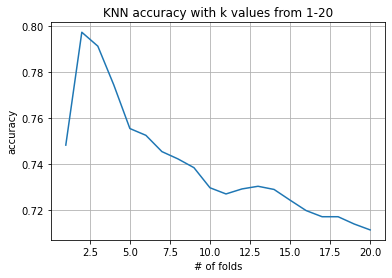

In [14]:
import matplotlib.pyplot as plt

r_values = []

for k in range(1, 21):
    r_values.append(knn_kfolds(X, y, 10, k, random_state=12))

plt.plot(range(1, 21), r_values)
plt.title("KNN accuracy with k values from 1-20")
plt.xlabel("# of folds")
plt.ylabel("accuracy")
plt.grid()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 2.3

**Write-up!** Based on your plot from [Problem 2.2](#Problem-2.2), which $k$ value would you pick for your final model? Explain why.

I would choose 2 as the k value because that is when the model is most accurate, as seen in the graph.

<!-- END QUESTION -->

## 3. Model Comparison with Cross Validation

As mentioned before, we can use cross validation to get a more thorough evaluation of model performance. Now, we will use CV for model comparison by substituting it in for the model selection process that we have used in above. Note that the approach below is actually not quite legal, since we already used all our data in kNN to select k in **Problem 2.2** and now we are using the _same_ data again to preform model comparison. 

In this section, we will compare our $k$-NN regression model with a linear regression model that we used back in `Lab4` when we last looked at the Boston Housing dataset.

### Problem 3.1

**Do this!** In the following cell, report the cross validation score (average $R^2$) of a $k$-NN model with the $k$ you selected in [Problem 2.3](#Problem-2.3) on `X_scaled`. Use a `random_state` of 5.

In [15]:
cross_val_score = knn_kfolds(X, y, 10, 2, random_state=5)

cross_val_score

0.7995681654409791

<!-- BEGIN QUESTION -->

### Problem 3.2

Now let's do 10-fold cross validation on a linear regression model on `X` without scaling.

**Write-up** Why should shouldn't we use scaling here? What will happen if we do?

Linear regression doesn't require scaling because it doesn't do anything for a straight line. Scaling will only yield an equivalent solution.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Do this!** Perform 10-fold cross validation for linear regression on `X` and report the average $R^2$ value across all of the folds.

* Ensure that you make and **fit a new model** for each fold.
* Use the same random state as we used to evaluate k-NN, so that the cross-validation splits stay the **same**. 

> **Hint:** Refer to your work in [Problem 2.1](#Problem-2.1) and [Problem 3.1](#Problem-3.1).

In [16]:
from sklearn.linear_model import LinearRegression

r_sqrd = []
model3 = KFold(n_splits = 10, shuffle = True, random_state=10)
for train_in, test_in in model3.split(X):
    X_train, X_test = X[train_in], X[test_in]
    y_train, y_test = y[train_in], y[test_in]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    r_sqrd.append(model.score(X_test, y_test))

avg_score = sum(r_sqrd)/10

avg_score

0.7010882408167969

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 3.3

**Write-up!** What were the $R^2$ values for each of the models? Which model would you prefer? Why?

The R2 value for the Linear Regression model is 0.7010882408167972, while the R2 value for the KNeighborsRegressor model is 0.7652077509624957. I would choose the KNeighborsRegressor model because it has a higher accuracy on average. Note that we would not want too high of an accuracy because want to avoid overfitting, but 76.5% is not so high that we need to worry about that yet.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Problem 3.4

**Write-up!** What are your next steps as a data scientist now that you have decided which model to use? Describe two things (related to the DS workflow of this project). Did you notice any thing in our workflow above that was

Now that we have completed our model selection portion of the DS workflow, we should move on to optimizing the model. Once the model is optimized, we should run it on a new dataset, the testing set, to see if it really is accurate (though we unfortunately already used our testing data as our validation set, but suppose that we have another dataset to test with). If we find that it is not accurate, it's back to validating and tweaking, and we may need more data for that, so we may also need to repeat the data collection and cleaning/scaling process.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Write-up!** Did you notice any thing in our workflow above that was not quite right? If so share your critical review with your boss (well for now, with us). Thanks!

We cleaned and scaled our data, and then we used the data on two different models, a KNN model and a linear regression model. Using the models' R2 statistic, we determined that the KNN model was a better choice for the data. When we were setting up our data for use, however, we only created a training and a testing set. We used the training set to train the models, and we used the testing set to evaluate their accuracies. We have no more data for further testing the model now, meaning that we cannot confirm how well the model performs. We will have to tell our boss that we do not know how much more accurate the model can be without more data, which they may not like because they'll have to go get more data, and that's pretty expensive.

<!-- END QUESTION -->



---

To double-check your work, the cell below will rerun all of the autograder tests.

In [17]:
grader.check_all()

q1c results: All test cases passed!

q2a results: All test cases passed!

q3a results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [231]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)